Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


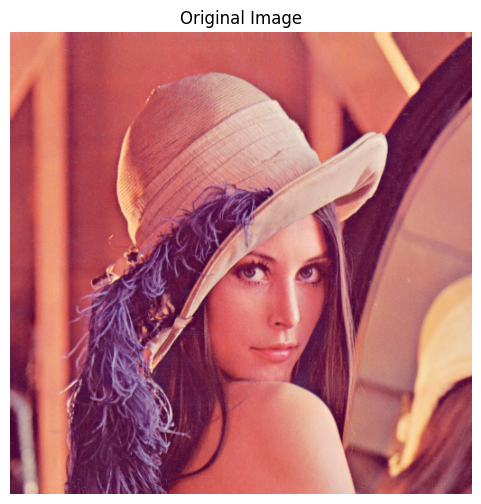

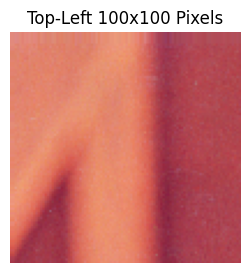

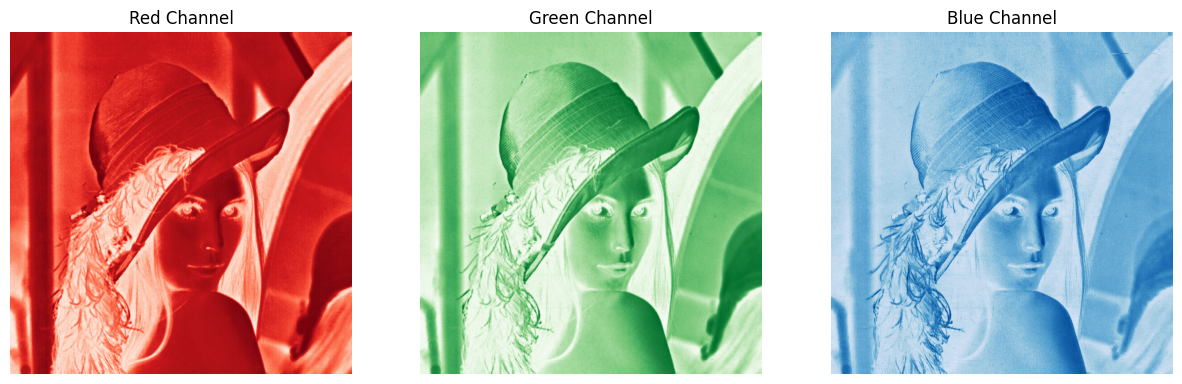

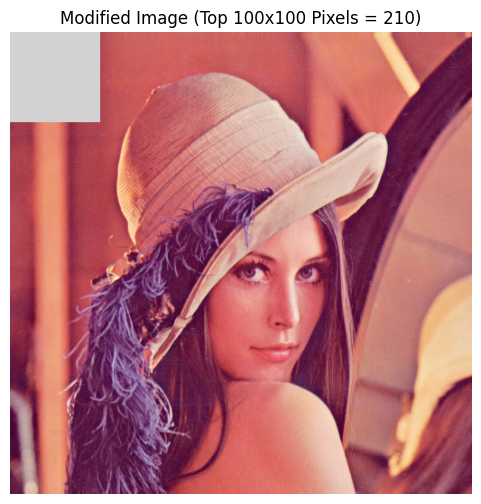

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

image_path = "/content/drive/MyDrive/AI and ML/Lenna_(test_image).png"

image = Image.open(image_path)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

top_left = np.array(image)[:100, :100]
plt.figure(figsize=(3, 3))
plt.imshow(top_left)
plt.axis("off")
plt.title("Top-Left 100x100 Pixels")
plt.show()

image_array = np.array(image)
red_channel = image_array[:, :, 0]
green_channel = image_array[:, :, 1]
blue_channel = image_array[:, :, 2]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(red_channel, cmap="Reds")
ax[0].set_title("Red Channel")
ax[0].axis("off")
ax[1].imshow(green_channel, cmap="Greens")
ax[1].set_title("Green Channel")
ax[1].axis("off")
ax[2].imshow(blue_channel, cmap="Blues")
ax[2].set_title("Blue Channel")
ax[2].axis("off")
plt.show()

modified_image = np.array(image)
modified_image[:100, :100] = [210, 210, 210]
modified_image_pil = Image.fromarray(modified_image)

plt.figure(figsize=(6, 6))
plt.imshow(modified_image_pil)
plt.axis("off")
plt.title("Modified Image (Top 100x100 Pixels = 210)")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


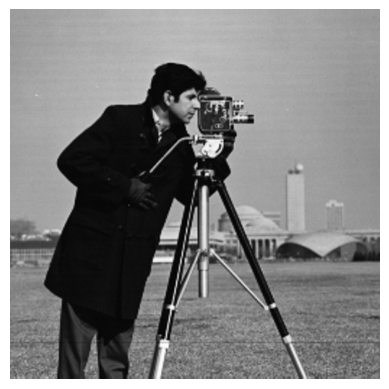

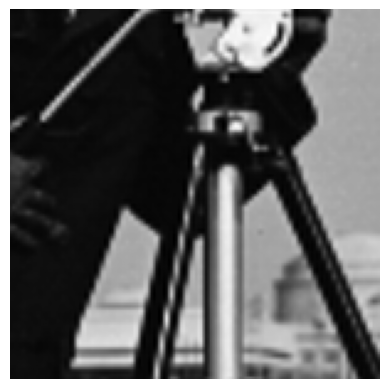

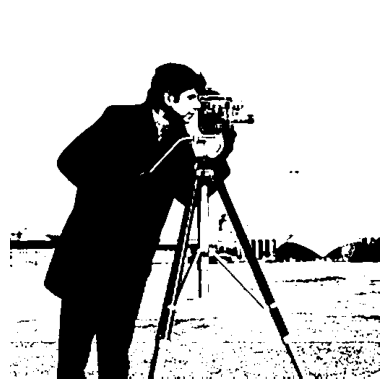

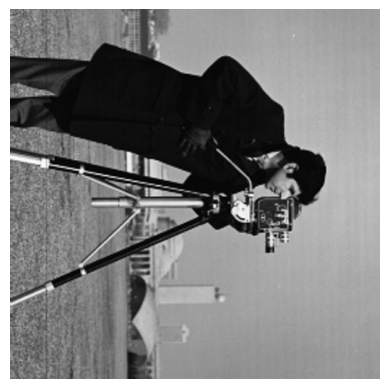

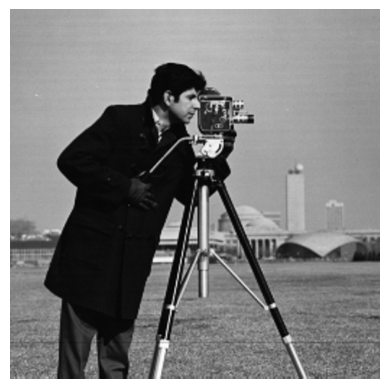

In [ ]:
from google.colab import drive
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

drive.mount('/content/drive')

image_path = '/content/drive/MyDrive/AI and ML/cameraman.png'

image = Image.open(image_path).convert('L')

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

image_array = np.array(image)

height, width = image_array.shape
top = (height - 150) // 2
left = (width - 150) // 2
middle_section = image_array[top:top+150, left:left+150]

plt.imshow(middle_section, cmap='gray')
plt.axis('off')
plt.show()

binary_image = np.where(image_array < 100, 0, 255).astype(np.uint8)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

rotated_image = image.rotate(-90, expand=True)

plt.imshow(rotated_image, cmap='gray')
plt.axis('off')
plt.show()

rgb_image = image.convert('RGB')

plt.imshow(rgb_image)
plt.axis('off')
plt.show()


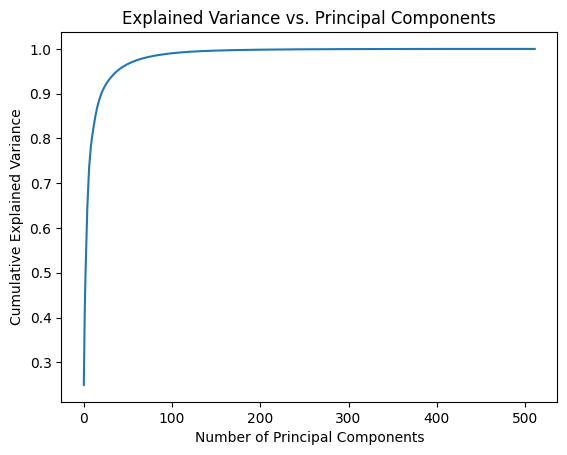

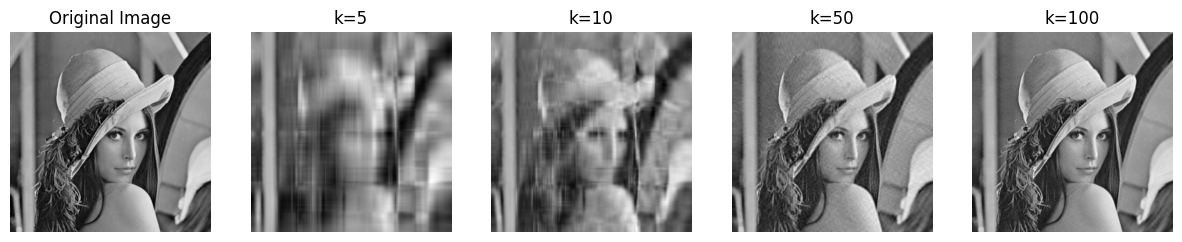

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA

image = Image.open('/content/drive/MyDrive/AI and ML/lena_gray.gif').convert('L')
image_array = np.array(image)

mean_image = np.mean(image_array, axis=0)
centered_image = image_array - mean_image

cov_matrix = np.cov(centered_image, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

explained_variance = eigenvalues_sorted / np.sum(eigenvalues_sorted)
cumulative_variance = np.cumsum(explained_variance)

plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Principal Components')
plt.show()

def reconstruct_image(k):
    selected_eigenvectors = eigenvectors_sorted[:, :k]

    transformed_data = np.dot(centered_image, selected_eigenvectors)

    reconstructed_image = np.dot(transformed_data, selected_eigenvectors.T) + mean_image
    return reconstructed_image

k_values = [5, 10, 50, 100]
reconstructed_images = [reconstruct_image(k) for k in k_values]

fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(15, 5))
axes[0].imshow(image_array, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, k in enumerate(k_values):
    axes[i+1].imshow(reconstructed_images[i], cmap='gray')
    axes[i+1].set_title(f'k={k}')
    axes[i+1].axis('off')

plt.show()
